<div style="border:solid Chocolate 2px; padding: 40px">

<b> Ольга, привет!👋</b>

Меня зовут Алексей Гриб, и я буду ревьюером твоего проекта. 

Сразу хочу предложить в дальнейшем общаться на "ты" - надеюсь, так будет комфортнее:) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!
    
Цель ревью - не искать ошибки в твоём проекте, а помочь тебе сделать твою работу ещё лучше, устранив недочёты и приблизив её к реальным задачам аналитика. Поэтому не расстраивайся, если что-то не получилось с первого раза - это нормально, и это поможет тебе вырасти!
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Критичные ошибки, которые обязательно нужно исправить.
</div>

Я не смогу принять проект, если в нём будет хотя бы одна критичная ошибка или несколько некритичных ошибок - тогда проект нужно будет немного доработать. Но это нестрашно - я обязательно дам тебе подсказку или укажу верное направление.
    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Привет!
    
Твоя основная ошибка спряталась в начале проекта: по условию проекта, мы должны ресэмплировать данные в ряд с градацией в 1 час, а ты сделала градацию в 1 день - соответственно, все дальнейшие расчёты и выводы нужно будет переделывать:)
    
Возвращаю тебе проект без проверки, так как не выполнены блоки 3 и 4, а также есть ошибка, которая изменит выводы во всём проекте.
</div>

In [1]:
import pandas as pd
import os
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.stattools import adfuller
from sklearn.dummy import DummyRegressor

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали - отлично! Спасибо, что перезапускаешь проект перед отправкой на ревью - это важный шаг, который поможет избежать простых и досадных ошибок при воспроизведении решнеия:)
</div>

In [2]:
pth1 = '/datasets/taxi.csv'
pth2 = 'C:/Users/n.kirpichnikov/Desktop/Оля Учеба/Проекты/Временные ряды/taxi.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1,index_col=[0], parse_dates=[0] )
elif os.path.exists(pth2):
    data = pd.read_csv(pth2, index_col=[0], parse_dates=[0])
else:
    print('Something is wrong')

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Здесь твой проект падает с ошибкой чтения файла с данными: так как ты прописала только локальный путь к файлу, то при попытке исполнения проекта на сервере появляется ошибка ссылки на несуществующую директорию с файлом данных.
    
При считывании данных из файла здорово перестраховывать себя от ошибок, связанных, например, с неверным указанием пути к файлу. А иногда бывает, что работаешь с файлом локально, выгружаешь его на сервер, ожидая, что он будет принимать данные, которые лежат на том же сервере, а код падает с ошибкой, потому что путь к файлу не поменялся с локального на серверный.
    
Для этого, например, можно использовать конструкцию `try-except`: сначала пробуешь локальный путь, при возникновении ошибки используется серверный путь (подробнее можешь почитать тут: https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html).
    
Но еще лучше использовать библиотеку `os` - её использование позволит тебе отойти от прописывания путей к файлу (а локальные директории могут меняться часто в зависимости от пользователя) и перейти к автоматическому определению пути к файлу с помощью модуля `path`. Как пример:
    
    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'
    
    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong')
    
В нём мы указываем только непосредственно директорию с файлом, а уже путь к ней модуль `path` определит самостоятельно.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Окей, порядок!
</div>

Проверим в хронологическом ли порядке находятся записи в таблице

In [3]:
print(data.index.is_monotonic)

True


<div class="alert alert-info">
<h2> Комментарий студента V4 <a class="tocSkip"> </h2>

Алексей, подскажи, пожалуйста, нужно ли делать data.sort_index, если data.is_monotonic показал true. То есть даты и так были в хронологическом порядке, зачем их опять сортировать по индексу?
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Если `.is_monotonic()` возвращает `True`, то не нужно:) Обычно сначала проверяют хронологичность через `.is_monotonic()`, и если возвращается `False`, то выполняются сортировку вручную.
</div>

In [4]:
data.sort_index(inplace=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Отсортировали индекс-дату - отлично!
</div>

In [5]:
display(data)

num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32
...                         ...
2018-08-31 23:10:00          32
2018-08-31 23:20:00          24
2018-08-31 23:30:00          27
2018-08-31 23:40:00          39
2018-08-31 23:50:00          53

[26496 rows x 1 columns]

In [6]:
data.isna().mean()

num_orders    0.0
dtype: float64

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Проверили явные пропуски - окей, важная проверка.
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
При работе с временными рядами важно проверить отсутствие неявных дубликатов - чаще всего у нас не должно быть двух и более записей на одну и ту же дату. Стоит проверить, так ли это.
        </div>

Проверим наличие дубликатов

In [7]:
data.reset_index().duplicated(['datetime']).sum()

0

## Анализ

### Ресемплирование по одному часу

In [8]:
data=data.resample('1H').sum()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Выполнили ресэмплирование данных с градацией по часу с применением функции суммирования - отличное и наиболее логичное решение для этой задачи!
</div>

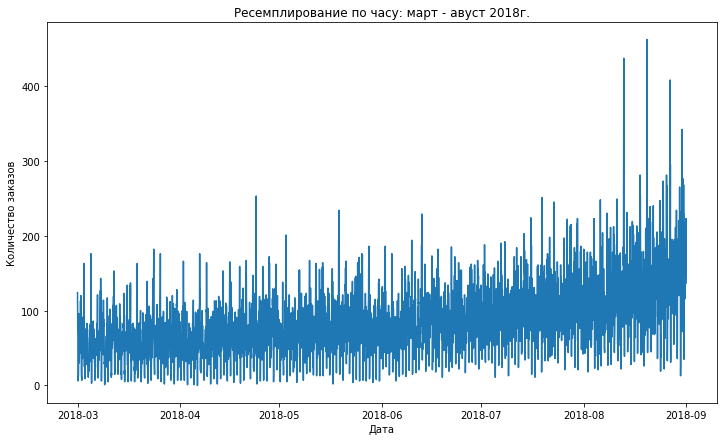

In [9]:
plt.figure(figsize=(12, 7))
plt.plot(data)
plt.title('Ресемплирование по часу: март - авуст 2018г.')
plt.xlabel("Дата")
plt.ylabel("Количество заказов")
plt.show()

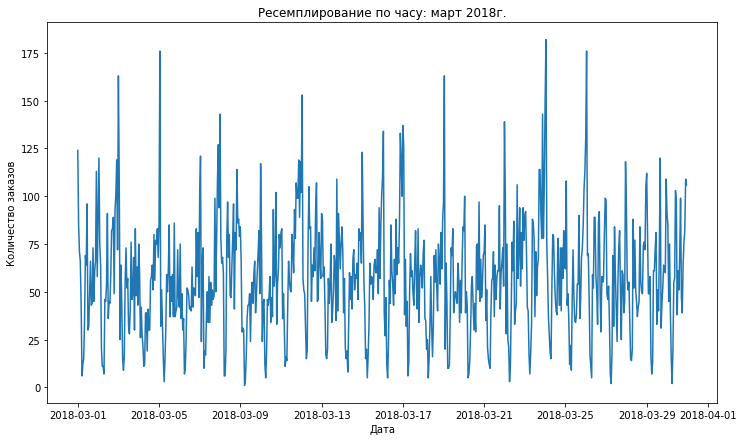

In [10]:
plt.figure(figsize=(12,7))
plt. plot(data['2018-03-01':'2018-03-30'])
plt.title('Ресемплирование по часу: март 2018г.')
plt.xlabel("Дата")
plt.ylabel("Количество заказов")
plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Исследовали исходный временной ряд - отлично!
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Хотел бы подсказать несколько рекомендаций по улучшению твоих визуализаций:
1. Стоит подписать названия осей X и Y.
2. Также стоит дать название графику.
3. Технические комментарии типа `<AxesSubplot:xlabel='datetime'>` стоит убирать: это можно сделать, поставив точку с запятой в последней строке кода в блоке визуализации, либо сделать последней строкой кода этого блока метод `plt.show()`.
4. Стоит оптимизировать график по размеру: не стоит делать графики слишком маленькими, но и перебарщивать с размером, чтобы график в ячейке приходилось скроллить, тоже не стоит. Дефолтный размер графика почти всегда не самый оптимальный, поэтому его стоит оптимизировать всегда:)
        
Несколько таких нехитрых приёмов очень повысят ценность твоей визуализации:)
        
Будет здорово, если ты учтёшь эти комментарии для всех графиков в твоей работе.
</div>

<div class="alert alert-info">
<h2> Комментарий студента V4 <a class="tocSkip"> </h2>

Добавила название осей, убрала техническу ошибку, добавила название графика. С размером графика я добавила plt.figure(figsize=(10, 10)), но размеры графика по факту не изменились. Пробовала подставлять разные цифры в figsize, но размеры графика от этого не меняются) Помоги, пожалуйста)
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Нет названия осей - возможно, не сохранился прогресс? Можно использовать методы `plt.xlabel()` и `plt.ylabel()`.
    
По поводу размера - ты верно используешь метод `plt.figure()`, однако дело в том, что настраиваешь визуализацию ты через `plt`, а сама визуализация происходит через метод Pandas `plot` - в результате используются методы из двух библиотек, которые не стыкуются друг с другом. Вместо `data.plot()` попробуй `plt.plot(data)` - должно завестись:)
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.5 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Учтено.
</div>

Посмотрим поближе динамику в течение недели с понедельника по воскресенье за март


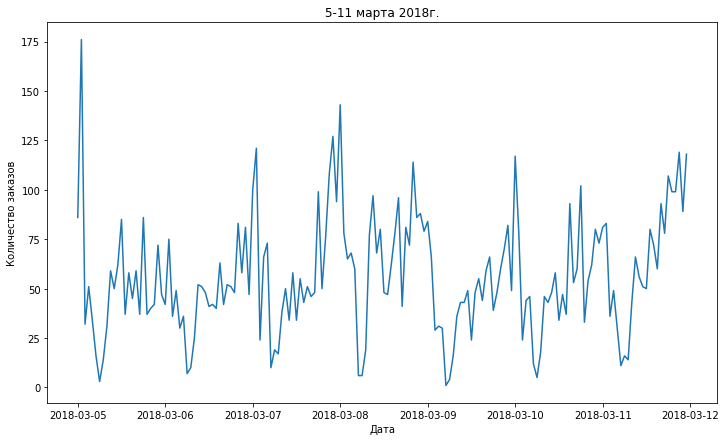

In [11]:
plt.figure(figsize=(12, 7))
plt.plot(data['2018-03-05':'2018-03-11'])
plt.title('5-11 марта 2018г.')
plt.xlabel("Дата")
plt.ylabel("Количество заказов")
plt.show()

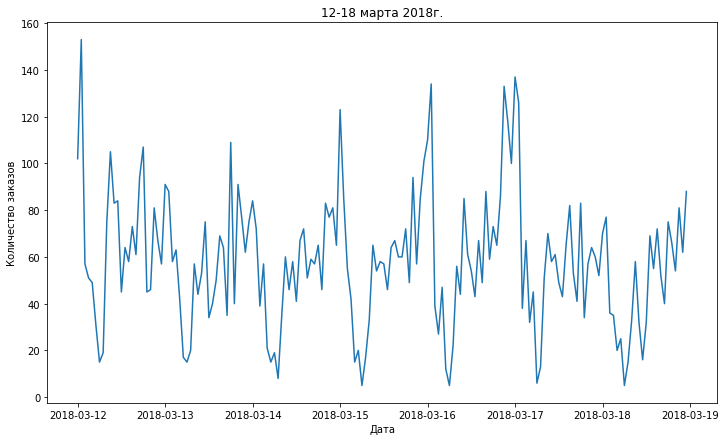

In [12]:
plt.figure(figsize=(12, 7))
plt.plot(data['2018-03-12':'2018-03-18'])
plt.title ('12-18 марта 2018г.')
plt.xlabel("Дата")
plt.ylabel("Количество заказов")
plt.show()

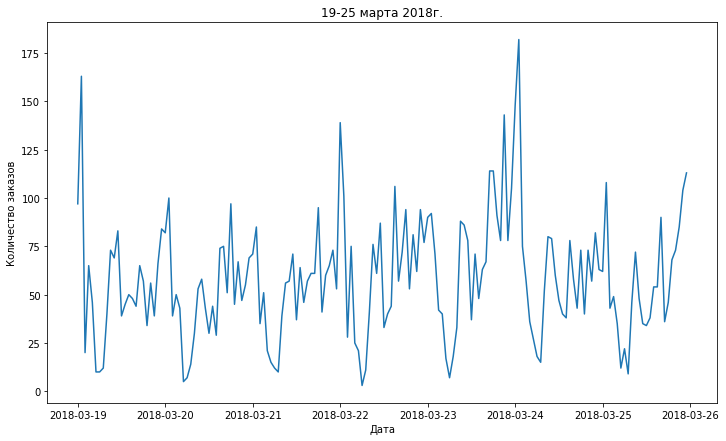

In [13]:
plt.figure(figsize=(12,7))
plt.plot(data['2018-03-19':'2018-03-25'])
plt.title('19-25 марта 2018г.')
plt.xlabel("Дата")
plt.ylabel("Количество заказов")
plt.show()

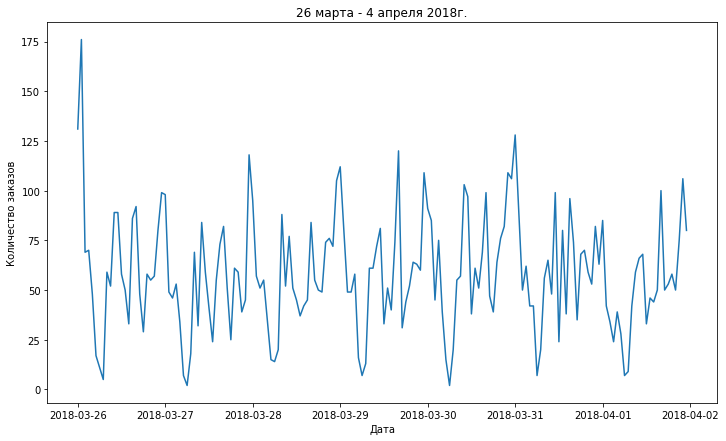

In [14]:
plt.figure(figsize=(12, 7))
plt.plot(data['2018-03-26':'2018-04-01'])
plt.title('26 марта - 4 апреля 2018г.')
plt.xlabel("Дата")
plt.ylabel("Количество заказов")
plt.show()

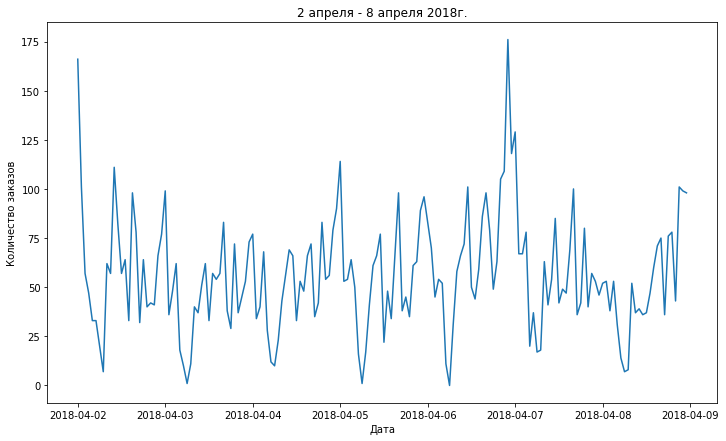

In [15]:
plt.figure(figsize=(12,7))
plt.plot(data['2018-04-02':'2018-04-08'])
plt.title('2 апреля - 8 апреля 2018г.')
plt.xlabel("Дата")
plt.ylabel("Количество заказов")
plt.show()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Не учтены замечания по визуализации для графиков выше - исправь их, пожалуйста.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.5 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Учтено.
</div>

Мы видим, что количество заказов во все дни недели приблизительно одинаковое (за некоторыми исключениями). Нет закономерности или  зависимости от дня недели. Одновременно видна суточная сезонность. Посмотрим поближе динамику в тебение дня - в разные месяцы.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Тут всё отлично!
</div>

Посмотрим на динамику в выходные дни

Выходной день в мае - 26.05.2018

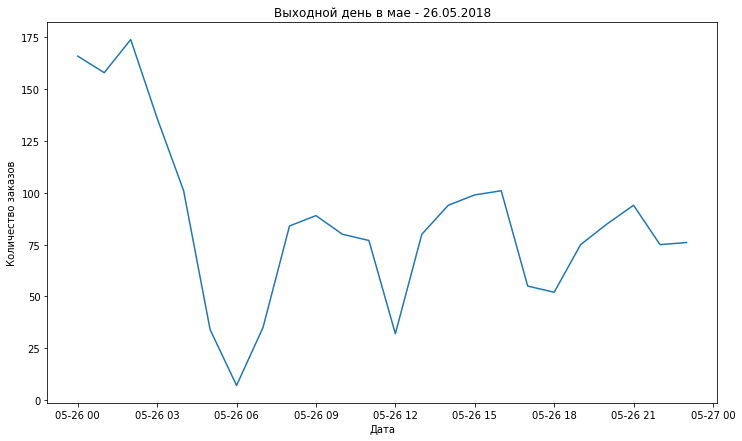

In [16]:
plt.figure(figsize=(12,7))
plt.plot(data['2018-05-26':'2018-05-26'])
plt.title('Выходной день в мае - 26.05.2018')
plt.xlabel("Дата")
plt.ylabel("Количество заказов")
plt.show()

Выходной день в августе - 18.08.2018

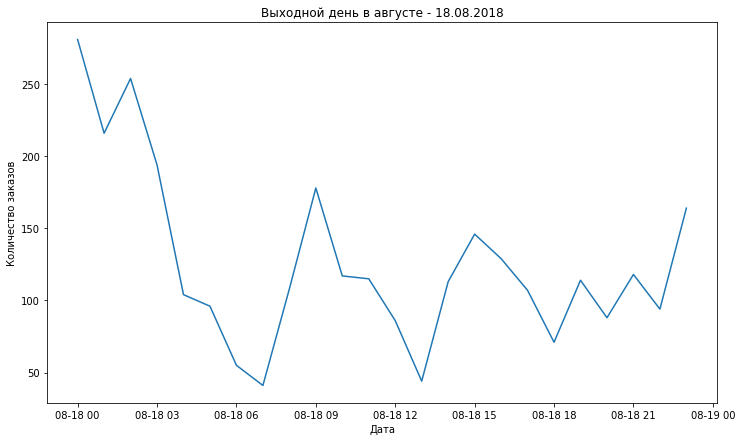

In [17]:
plt.figure(figsize=(12,7))
plt.plot(data['2018-08-18':'2018-08-18'])
plt.title('Выходной день в августе - 18.08.2018')
plt.xlabel("Дата")
plt.ylabel("Количество заказов")
plt.show()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Не учтены замечания по визуализации для графиков выше - исправь их, пожалуйста.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.5 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Учтено.
</div>

Мы видим похожую динамику между месяцами и некоторую закономерность. В выходные дни наибольшая активность наблюдается ночью с 0 до 3 и далее в течении дня - уровень заказов постоянно меняется с небольшим отклонением от среднего уровня. 

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Окей, всё верно!
</div>

Посмотрим на динамику в рабочие дни

Рабочий день в мае 15.05.2018

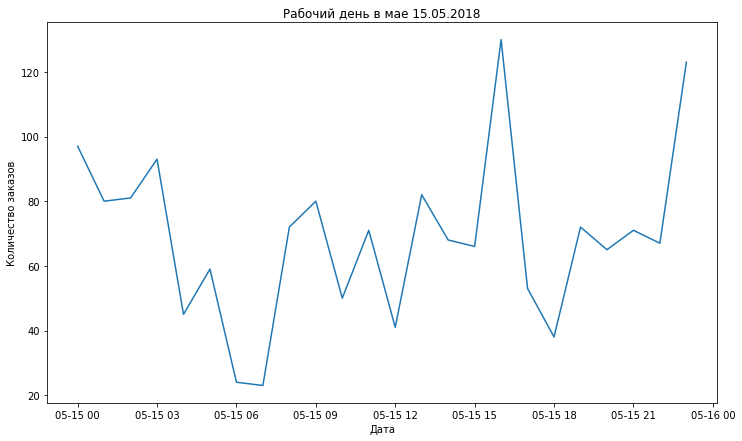

In [18]:
plt.figure(figsize=(12,7))
plt.plot(data['2018-05-15':'2018-05-15'])
plt.title('Рабочий день в мае 15.05.2018')
plt.xlabel("Дата")
plt.ylabel("Количество заказов")
plt.show()

Рабочий день в августе 15.08.2018

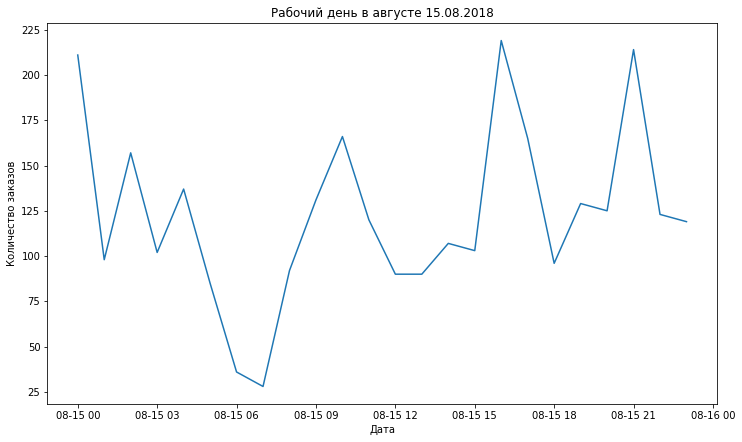

In [19]:
plt.figure(figsize=(12,7))
plt.plot(data['2018-08-15':'2018-08-15'])
plt.title('Рабочий день в августе 15.08.2018')
plt.xlabel("Дата")
plt.ylabel("Количество заказов")
plt.show()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Не учтены замечания по визуализации для графиков выше - исправь их, пожалуйста.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.5 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Учтено.
</div>

Мы видим похожую динамику между месяцами и некоторую закономерность. В рабочие дни идет подъем заказов где-то в районе 17:00, далее после 21:00. Самый низкий уровень заказов в районе 6 утра.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Тут тоже всё верно!
</div>

### Seasonal_decompose

 Функция seasonal_decompose() раскладывает временной ряд на три составляющие: тренд, сезонность и остаток (англ. residuals) - компонента, которая не объясняется трендом и сезонностью, это шум. Шум спргнозировать нельзя. 

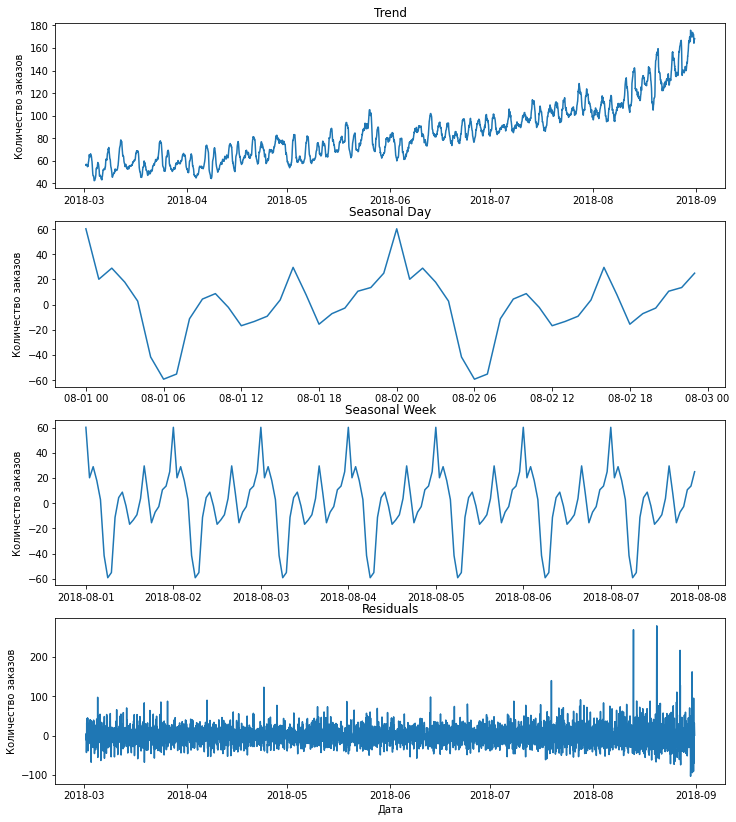

In [20]:
decomposed = seasonal_decompose(data)
plt.figure(figsize=(12, 14))
plt.subplot(4,1,1) #the figure has 4 rows, 1 column, and this plot is the first plot.
plt.plot(decomposed.trend)
plt.title('Trend') 
plt.ylabel("Количество заказов")
plt.subplot(4,1,2)
plt.plot(decomposed.seasonal['2018-08-01':'2018-08-02'])
plt.title('Seasonal Day') 
plt.ylabel("Количество заказов")
plt.subplot(4,1,3)
plt.plot(decomposed.seasonal['2018-08-01':'2018-08-07'])
plt.title('Seasonal Week')  
plt.ylabel("Количество заказов")
plt.subplot(4,1,4)
plt.plot(decomposed.resid)
plt.title('Residuals') 
plt.ylabel("Количество заказов")
plt.xlabel("Дата");

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Не учтены замечания по визуализации для графиков выше - исправь их, пожалуйста.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.5 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Учтено.
</div>

На этих графиках точно видно, что есть тренд - плавное увеличение заказов с марта по август. А также есть сезонность в течение дня с наименьшим уровенм заказов в 6 утра и пиком заказов в 0 частов ночи. В течение недели сезонности не видно. В течение недели ряд более стационарный.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Компоненты ряда визуализированы и проанализированы - супер!
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Как думаешь, чем обсуловлена природа сезонности? Важно помнить, что у нас данные про заказы такси в аэропортах.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Не учтено.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.5 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Не учтено.
</div>

### Стационарность

Нестационарные ряды  прогнозировать сложнее: их свойства меняются слишком быстро.

В стационарных временных рядах статистические свойства не зависят от времени, поэтому результат легко предсказать. Большинство статистических методов предполагают, что все временные ряды должны быть стационарными. 

В нестационарных временных рядах статистические свойства меняются со временем. Они показывают сезонные эффекты, тренды и другие структуры, которые зависят от временного показателя. 

Для классических статистических методов удобнее создавать модели стационарных временных рядов. Если прослеживается четкая тенденция или сезонность во временных рядах, то следует смоделировать эти компоненты и удалить их из наблюдений.

Проведем тест  Dickey–Fuller test (ADF) чтобы оценить стационарность ряда

In [21]:
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(data['num_orders'])
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -3.0689242890279558
ADF p-values: 0.028940051402612906
ADF number of lags used: 30
ADF number of observations: 4385
ADF critical values: {'1%': -3.431842162413052, '5%': -2.8621993540813637, '10%': -2.567120978470452}
ADF best information criterion: 41728.71357827463


Нулевая гипотеза - ряд нестационарный. Так как p-value = 0.02 (при уровне значимости 0.01) мы не отвергаем нулевую гипотезу. То есть ряд - не стационарный. Это также подтверждается графиками выше, есть явное наличие тренда и сезонности. Также график residual - показывает значительные всплески - это тоже признак нестационарности. 

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Круто, что есть проверка ряда на стационарность!
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Тут есть пара моментов для улучшения.
    
1. Помимо нулевой гипотезы, стоит сформулировать и альтернативную.
2. Решение о стационарности ряда стоит пересмотреть:
- несмотря на то, что на уровне значимости `0.05` мы отвергаем гипотезу о нестационарности ряда, на уровне значимости `0.01` мы не сможем её отвергнуть: в ситуациях, когда один и тот же тест на разных уровнях значимости показал разный результат,  надёжнее предерживаться консервативного подхода и не отклонять нулевую гипотезу: лучше перестраховываться от ошибки первого рода, отвергнув верную нулевую гипотезу;
- трендовая компонента ряда имеет повышательный характер;
- график остатков демонстрирует периодические всплески, к концу ряда появляется сильный разброс - это также признаки нестационарности ряда;
3. Анализ исходного временного ряда стоит дополнить рядом, сглаженным скользящим средним - это также поможет сделать вывод о стационарности ряда. Если с течением времени среднее не изменяется - ряд стационарен, если изменяется - нестационарен.
</div>

<div class="alert alert-info">
<h2> Комментарий студента V4 <a class="tocSkip"> </h2>

исправила вывод
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Учтено почти всё - стоит также добавить график со сглаженным средним. Напомню, что для этого сначала делается отступ `.shift()`, а потом используется метод `.rolling()` с заданным окном сглаженивания, к результатам применяется функция `.mean()`, чтобы получить именно среднее скользящее. В тренажре был пример - можно обратиться к нему, если нужно освежить в памяти процесс.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.5 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Учтено.
</div>

Построим график скользящего стреднего. Если с течением времени среднее не изменяется - ряд стационарен, если изменяется - нестационарен.

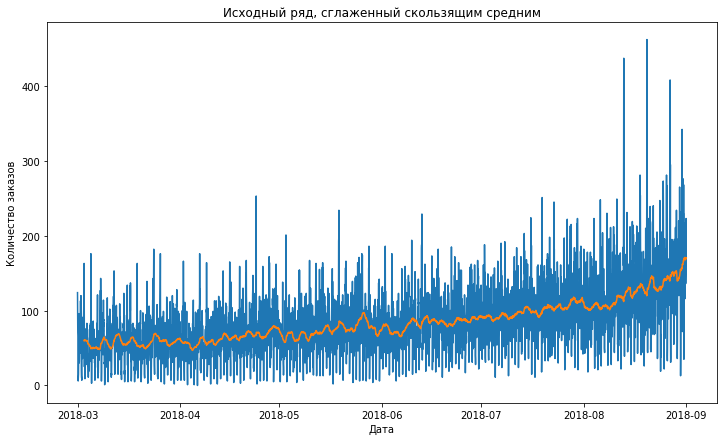

In [22]:
plt.figure(figsize=(12, 7))
data['rolling_mean']=data['num_orders'].shift().rolling(48).mean()
plt.xlabel("Дата")
plt.ylabel("Количество заказов")
plt.title('Исходный ряд, сглаженный скользящим средним')  
plt.plot(data)
plt.show()

Мы видим, что скользящее среднее меняется, есть увелиение к концу - следовательно ряд нестационарен. 

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Здесь заканчивается стрктурный блок работы - стоит делать промежуточные выводы о проделанной работе, это довольно полезная практика, которая имеет большую ценность для получателя отчёта.
        
Достаточно будет двух-трёх тезисных предложений об основных шагах и полученных выводах.
        
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Не учтено.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.5 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Не учтено.
</div>

## Обучение

### Создание признаков

У нас в этой задаче нет никаких признаков, есть только у. Возьмем в качетсве x - время. Создадим признак день недели (так как мы заметили, что в рабочие дни и в выходные динамика разная) и признак час- так как есть сезонность по часам в течение дня. 

Чтобы ряд сделать стационарным, найдём разности его значений. Разности временного ряда более стационарны, чем сам ряд.

In [23]:
def make_features(data, max_lag, rolling_mean_size):
    data_features = data.copy()
   
    data_features['dayofweek'] = data.index.dayofweek
    data_features['hour'] = data.index.hour
    for lag in range (1, max_lag+1):
        data_features['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    data_features['rolling_mean']=data['num_orders'].shift().rolling(rolling_mean_size).mean()
    return data_features

In [24]:
data_new = make_features(data, 24, 48)

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Есть функция для создания новых признаков - отлично!
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 
Организация работы функции таким образом, чтобы она работала с глобальной переменной - не самая хорошая практика: если что-то пойдёт не так, придётся заново запускать весь процесс предобработки данных. 
        
Лучше организовывать функцию так, чтобы она принимала на вход набор данных и возвращала результат работы, чтобы его можно было сохранить в новой переменной. Концепт:
        
    def foo(df):
        df.dropna(inplace=True)
    
    foo(df)
        
В этом случае изменения необратимы, так как мы модифицировали глобальную переменную `df` - эту переменную придётся загружать в память заново и заново её обрабатывать.
        

    def foo(df):
        return df.dropna()
    
    foo(df)
        
        
Изменения будут необратимы и в таком случае, даже несмотря на на наличие `return`: несмотря на то, что работаем мы с локальной переменной, функция всё равно работает с объектом в памяти, связанным с глобальной переменной, пусть и через алиас.
        
    def foo(df):
        df_foo = df.copy()
        return df_foo.dropna()
    
    df_new = foo(df)
        
Здесь внутри функции исходный объект копируется, и работа уже происходит с новым объектом. В этом случае результат работы функции с исходными данными мы складываем в новую переменную - таким образом исходная глобальная переменная не подвергается вмешательству и сохранятся на случай, если функция сработала неправильно.
        
</div>

<div class="alert alert-info">
<h2> Комментарий студента V4 <a class="tocSkip"> </h2>

исправила. добавила data_features в саму функцию и добавила data_new 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Учтено.
</div>

In [25]:
print(data_new)

                     num_orders  rolling_mean  dayofweek  hour  lag_1  lag_2  \
datetime                                                                       
2018-03-01 00:00:00         124           NaN          3     0    NaN    NaN   
2018-03-01 01:00:00          85           NaN          3     1  124.0    NaN   
2018-03-01 02:00:00          71           NaN          3     2   85.0  124.0   
2018-03-01 03:00:00          66           NaN          3     3   71.0   85.0   
2018-03-01 04:00:00          43           NaN          3     4   66.0   71.0   
...                         ...           ...        ...   ...    ...    ...   
2018-08-31 19:00:00         136    170.895833          4    19  207.0  217.0   
2018-08-31 20:00:00         154    170.208333          4    20  136.0  207.0   
2018-08-31 21:00:00         159    169.437500          4    21  154.0  136.0   
2018-08-31 22:00:00         223    169.208333          4    22  159.0  154.0   
2018-08-31 23:00:00         205    170.1

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Новые признаки создали - отлично!
</div>

### Разбиение на выборки

In [26]:
train, test=train_test_split(data_new, shuffle=False, test_size=0.1)

In [27]:
print (train.index.min(), train.index.max())

2018-03-01 00:00:00 2018-08-13 13:00:00


In [28]:
print (test.index.min(), test.index.max())

2018-08-13 14:00:00 2018-08-31 23:00:00


In [29]:
train=train.dropna()

In [30]:
test=test.dropna()

In [31]:
features_train=train.drop(['num_orders'], axis=1)

In [32]:
target_train=train['num_orders']

In [33]:
features_test=test.drop(['num_orders'], axis=1)

In [34]:
target_test=test['num_orders']

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
Сплитование сделано корректно как с точки зрения учёта специфики временного ряда (отключено перемешивание), так и размера тестовой выборки. Также выделили признаки для обучения и целевой признак - хорошо!
</div>

In [35]:
model_data = pd.DataFrame(columns=('model','fit_time','score_time','RMSE'))
model_data.head()

Empty DataFrame
Columns: [model, fit_time, score_time, RMSE]
Index: []

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
Удобный контейнер для сбора результатов работы с моделями - отлично!
</div>

### Линейная регрессия

In [36]:
model_lr=LinearRegression()

In [37]:
tscv=TimeSeriesSplit(n_splits=3)

In [38]:
cv_lr= cross_validate(model_lr, features_train, target_train, cv=tscv, scoring='neg_root_mean_squared_error')
fit_time = cv_lr['fit_time'].mean()
score_time = cv_lr['score_time'].mean()
test_score = abs(cv_lr['test_score'].mean())

In [39]:
lr_data = ['LinearRegression', fit_time, score_time, test_score]

#add to dataframe
model_data.loc[len(model_data)] = lr_data
model_data.head()

model  fit_time  score_time       RMSE
0  LinearRegression  0.059119    0.005425  28.236083

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
Протестировали линейную регрессию - отлично! Здорово, что используешь кросс-валидацию!
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Использование обычной кросс-валидации при работе с временными рядами - довольно критичная ошибка: в твоём случае за это отвечает параметр `cv` со значением 5, что эквивалентно стандартной кросс-валидации `k-folds`, которая перемешивает объекты обучения при делении на фолды, в результате чего модель учится на данных из будущего. Правильным решением будет использование специального инструмента библиотеки `sklearn` для кросс-валидации временных рядов `TimeSeriesSplit` (подробнее тут: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html). Он формирует фолды так, чтобы в фолдах для обучения не было данных из фолдов для тестирования, что критически важно при работе с временными рядами. Экземпляр этого валидатора нужно будет передать в параметр `cv` при использовании `GridSearchCV`.
    
Также рекомендую почитать статью о сплитовании для временных рядов - даст понимание, как работает `TimeSeriesSplit`: https://medium.com/@Hong_Tang/timeseries-split-with-sklearn-tips-8162c83612b9. 
    

</div>

<div class="alert alert-info">
<h2> Комментарий студента V4 <a class="tocSkip"> </h2>

Добавила TimeSeriesSplit в линейную регрессию и случайный лес
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Учтено.
</div>

### Случайный лес

In [40]:
model_rf=RandomForestRegressor()

In [41]:
param = {'max_depth':[2,3,4,5,6,7],
        'n_estimators':[100,200,300]}

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Важный момент о сетке гиперпараметров: для гиперпараметра `max_depth` перебираются значения из последовательности `[10, 20, 30]` - такая последовательность неоптимальна, так как при такой глубине деревья получатся слишком глубокими, и модель будет переобучаться. Стоит исследовать диапазон значений от 2-3 до 7-9 с шагом в 1 - для большинства задач такой глубины будет достаточно.
    

</div>

<div class="alert alert-info">
<h2> Комментарий студента V4 <a class="tocSkip"> </h2>

Заменила max depth на [2,3,4,5,6,7]
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Учтено.
</div>

In [42]:
rf_grid=GridSearchCV(estimator=model_rf, cv=tscv, param_grid = param, scoring='neg_root_mean_squared_error', n_jobs=-1)
rf_grid=rf_grid.fit(features_train, target_train)

In [43]:
results = rf_grid.cv_results_
best_index = rf_grid.best_index_

In [44]:
fit_time = results['mean_fit_time'][best_index]
score_time = results['mean_score_time'][best_index]
RMSE = (rf_grid.best_score_*-1)

In [45]:
rf_data = ['random_forest_grid', fit_time, score_time, RMSE]

model_data.loc[len(model_data)] = rf_data
model_data.head()

model  fit_time  score_time       RMSE
0    LinearRegression  0.059119    0.005425  28.236083
1  random_forest_grid  4.434385    0.031586  27.628368

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
Протестировали случайный лес - отлично! Круто, что есть подбор оптимальных гиперпараметров.
</div>

### LightGBM

In [46]:
model_lgb= LGBMRegressor()

In [47]:
param = {'n_estimators': [100, 200, 300], 
         'max_depth':[2,3,4,5,6,7],
         'learning_rate':[0.01, 0.05, 0.03, 0.1, 0.3, 0.5]
        }

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Здесь аналогичное замечание про `max_depth`.
    
Также для параметра `learning_rate` заданы только высокие значения - при таких значениях есть шанс перепрыгнуть глобальный минимум. Стоит добавить в последовательность и маленькие значения, вроде, `0.01`, `0.05`, `0.03` и др.
</div> 

<div class="alert alert-info">
<h2> Комментарий студента V4 <a class="tocSkip"> </h2>

Исправила
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Учтено.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
Вот тут специфика временного ряда для кросс-валидации учтена - такой же подход стоит использовать для предыдущих моделей.
</div>

In [48]:
gs = GridSearchCV(estimator=model_lgb,cv=tscv, param_grid=param,scoring='neg_root_mean_squared_error')

In [49]:
lgb_grid= gs.fit(features_train, target_train)

In [50]:
results = lgb_grid.cv_results_

best_index = lgb_grid.best_index_


fit_time = results['mean_fit_time'][best_index]
score_time = results['mean_score_time'][best_index]
RMSE = (lgb_grid.best_score_*-1)


In [51]:
lgbm_data = ['light_gbm_grid', fit_time, score_time, RMSE]

model_data.loc[len(model_data)] = lgbm_data
model_data.head()

model  fit_time  score_time       RMSE
0    LinearRegression  0.059119    0.005425  28.236083
1  random_forest_grid  4.434385    0.031586  27.628368
2      light_gbm_grid  1.062852    0.005376  26.003900

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
Протестировали `LGBMRegressor` - отлично!
</div>

### Сatboost

In [52]:
model_cbr = CatBoostRegressor()

In [53]:
grid_parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [900, 1000, 1100]
                 }

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Значения для гиперпараметра `iterations` подобраны неоптимально: за такое количество итераций ни один алгоритм, основанный на градиентном спуске, не сумеет достигнуть оптимальной точки. Стоит исследовать диапазон вокруг 1000 итераций (это значение используется по умолчанию во многих итеративных алгоритмах).
    
Также аналогичное замечание про `learning_rate`, только здесь наоборот больше маленьких значений - стоит добавить больших.
</div>

<div class="alert alert-info">
<h2> Комментарий студента V4 <a class="tocSkip"> </h2>

Исправила
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Учтено.
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Заново инициализировать `TimeSeriesSplit` не стоит - у нас уже есть один рабочий экземпляр.
</div>

<div class="alert alert-info">
<h2> Комментарий студента v.4 <a class="tocSkip"> </h2>

убрала
</div>
    

<div class="alert alert-success">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Учтено.
</div>

In [54]:
cbr_grid = GridSearchCV(estimator=model_cbr, param_grid = grid_parameters, cv = tscv, n_jobs=-1, scoring='neg_root_mean_squared_error' )


In [55]:
cbr_grid.fit(features_train, target_train)

0:	learn: 29.1253192	total: 51.4ms	remaining: 46.2s
1:	learn: 29.0015643	total: 55ms	remaining: 24.7s
2:	learn: 28.8824931	total: 58.4ms	remaining: 17.5s
3:	learn: 28.7666032	total: 61.8ms	remaining: 13.8s
4:	learn: 28.6439354	total: 65.2ms	remaining: 11.7s
5:	learn: 28.5158124	total: 68.6ms	remaining: 10.2s
6:	learn: 28.3867169	total: 71.9ms	remaining: 9.18s
7:	learn: 28.2685899	total: 75.2ms	remaining: 8.38s
8:	learn: 28.1539499	total: 78.4ms	remaining: 7.76s
9:	learn: 28.0413905	total: 81.7ms	remaining: 7.27s
10:	learn: 27.9213738	total: 85ms	remaining: 6.87s
11:	learn: 27.7885441	total: 88.4ms	remaining: 6.54s
12:	learn: 27.6777381	total: 91.6ms	remaining: 6.25s
13:	learn: 27.5687802	total: 95ms	remaining: 6.01s
14:	learn: 27.4624183	total: 98.3ms	remaining: 5.8s
15:	learn: 27.3459144	total: 102ms	remaining: 5.62s
16:	learn: 27.2269818	total: 105ms	remaining: 5.45s
17:	learn: 27.1114439	total: 108ms	remaining: 5.3s
18:	learn: 27.0030608	total: 112ms	remaining: 5.18s
19:	learn: 26.8

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=<catboost.core.CatBoostRegressor object at 0x7fb0398d7160>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [900, 1000, 1100],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='neg_root_mean_squared_error')

In [56]:
results = cbr_grid.cv_results_

best_index = cbr_grid.best_index_


fit_time = results['mean_fit_time'][best_index]
score_time = results['mean_score_time'][best_index]
RMSE = (cbr_grid.best_score_*-1)

In [57]:
catboost_data = ['CatBoost', fit_time, score_time, RMSE]

model_data.loc[len(model_data)] = catboost_data
model_data.head()

model  fit_time  score_time       RMSE
0    LinearRegression  0.059119    0.005425  28.236083
1  random_forest_grid  4.434385    0.031586  27.628368
2      light_gbm_grid  1.062852    0.005376  26.003900
3            CatBoost  4.593317    0.003649  26.062814

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
Протестировали `CatBoost` - отлично!
</div>

 Лучший результат у CatBoost - поэтому проведем тестирование по этой модели.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
Отобрали лучшего кандидата для тестирования на тестовой выборке - отлично!
</div>

## Тестирование

In [58]:
preds_cbr=cbr_grid.predict(features_test)

In [59]:
RMSE = mean_squared_error(preds_cbr, target_test , squared=False)

In [60]:
print(RMSE)

40.620891898125265


Мы видим, что RMSE по всем моделям меньше 48 - т.е. удовлетворяет условиям задачи.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
Лучшая модель обеспечивает требуемое качество предсказаний - отличный результат, молодец!
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Здесь также было бы очень полезно визуализировать предсказания твоей лучшей модели и сравнить их с правильными ответами в формате линейного графика - так мы сможем более наглядно понять, в каких местах твоя модель делает хорошие предсказания, а в каких ошибается.

</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Не учтено.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.5 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Не учтено.
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Очень важно также проверить лучшую модель на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу - вдруг окажется, что не было бы большого смысла заниматься созданием новых признаков, тюнингом и кросс-валидацией моделей, если можно было бы просто предсказывать среднее значение тренировочной выборки? 
    
В качестве константной модели можно использовать `DummyRegressor` (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) -  эта модель как раз создана для генерирования константных предсказаний.
        </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.4 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
Учтено.
</div>

In [61]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
preds_dummy=dummy_regr.predict(features_test)
RMSE_dummy = mean_squared_error(preds_dummy, target_test , squared=False)
print(RMSE_dummy)

84.5807770460722


RMSE у dummy модели хуже, чем RMSE у нашей оптимальной модели Catboost. Значит мы не зря старались и наша оптимальная модель достаточно хорошо обучена.

## Вывод

Мы построили модель для предсказания количества заказов такси на следующий час. Для этого мы загрузили датасет с историческими данными о заказах такси в аэропорты. В датасете оказалось около 26.5 тысяч записей с количеством заказов каждые 10 минут с период с марта 2018 г. по август 2018 г. Мы провели ресемплирование по одному часу. Далее мы проанализировали наличие трендов и сезонности. Обнаружили тренд на повышение количества заказов с марта по август а также сезонность в течение дня. Наибольшое количество заказов в течение суток наблюдалось в 0 ночи и наименьшее количество заказов в 6 утра. Далее мы провели обучение 4 моделей - линейная регрессия, LightGBM, Catboost и Random forest с подбором параметров. Перед этим мы создали признаки из времени, а имеено - день недели и час, лаг и скользящее среднее задали как 24 и 48. При таких параметрах лучшей моделью оказалась catboost. На тестовой выборке результат RMSE=41.46 - что удовлетворяет условиям задачи.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
Отличный итоговый вывод по проекту!
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Ольга, возвращаю тебе проект на доработку - ревью продолжим после исправления ошибки в начале проектя и завершения недостающих шагов проекта.
    
Жду тебя на повторном ревью:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.2.

Ольга, спасибо, что прислала проект на повторное ревью: вижу, тебе удалось исправить ошибку и закончить проект до конца:) 
    
К сожалению, второй возвращаю тебе проект без проверки - при перезапуске проекта код падает со ссылкой на несуществующую директорию.
    
Я оставил тебе подсказку о том, как эту проблему можно устранить. Со своей стороны обещаю взять твой проект вне очереди, когда пришлёшь его на следующее ревью.
    
Жду тебя снова:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.3.

Ольга, ты хорошо потрудилась над этим проектом - работа получилась на довольно хорошем уровне!

Ты верно выполнила все задания проекта, последовательно прошла все его шаги, получила верные выводы и ничего не упустила в процессе - это классно, ты молодец!
    
Ты неплохо используешь визуализацию, умело подбираешь тип графиков для объяснения данных. Понравилось также, что ты не ограничилась использованием простеньких алгоритмов типа линейной регрессии, а использовал более продвинутые инструменты вроде случайного леса и бустинга. Также реализован механизм подбора гиперпараметров моделей с использованием `GridSearchCV`, для части моделей кросс-валидация проведена с учётом специфики временных рядов - несомненный плюс!
    
В проекте есть рекомендации по повышению его общего качества. Несмотря на то, что они не являются критическими по степени влияния на итоговый результат, они всё же призваны обратить внимание на какие-то ошибки, неточности или узкиие моменты. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в проекте есть критические замечания. Важно устранить эти замечания, чтобы проект был принят. К ним я оставил комментарии красного цвета, в которых описаны необходимые для устранения замечаний действия.  
    
Если по тому, что нужно сделать, будут вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью:)
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)

<div class="alert alert-info">
<h2> Комментарий студента V4 <a class="tocSkip"> </h2>

Алексей, привет! Спасибо большое за твои очень полезные коментарии. Может ты посоветуешь какую то статью, где можно почитать про то, какие значения параметров подставлять в gridsearch в зависимости от разных моделей. Ты мне указал конкретные цифры для каждого гиперпараметра, на что нужно исправить, я исправила, но мне не до конца понятна суть. Сложно ориентироваться в этих цифрах, пока они мне ни о чем не говорят. Может можно где то почитать про max depth, количество итераций и learning rate - именно про то какие значения оптимально задавать. Спасибо большое!
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.4.

Ольга, спасибо, что прислала проект на повторное ревью: учтены почти все замечания - мы на шаг ближе к завершению работы над проектом, спасибо за внесённые правки:)
    
К некоторым шагам проекта ещё стоит вернуться - актуальные замечания указаны в комментариях с меткой `v.4`. 
    
О твоём вопросе - я не встречал статей, где описывался бы рецепт подбора последовательностей для перебора, понимание обычно приходит с опытом и экспериментами. В целом основные рецепты я уже описал в комментариях - какие значения были неоптимальны и в какую сторону их стоит подкрутить. В остальном - это уже эксперименты и подбор значений под каждую конкретную задачу:)
    
Жду твой проект на повторном ревью:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.5.

Ольга, основные замечания по проекту учтены - твой проект принят!
    
Несколько некритических замечаний и рекомендаций не были учтены - предлагаю тебе учесть их самостоятельно при оформлении проекта для твоего портфолио.
    
Спасибо за качественную и упорную работу над проектом, желаю успехов в дальнейшем обучении:)